#### Example 2: Isobaric evaporation of liquid hydrogen in a 80 $\text{m}^3$ tank
This application corresponds to LH2 storage in a hydrogen service station.


## Desired input and output
* Tank geometrical properties, see "tan
* Cryogen: .CSV file with the cryogen ID consistent with coolprop
* Popular cryogens: hydrogen, methane, nitrogen, oxygen.


In [1]:
# Ensure that python finds the submodules
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

#### Use example

Analyse BOG rates of liquid hydrogen in a retrofitted LNG storage tank,and compare it to methane BOG rates

In [2]:
# Retrofitted LNG tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 76.4 # Internal diameter / m
d_o = 80   # External diameter / m
T_air = 293.15 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 0.0371 # W/m2/K
U_V = 0.0371 # W/m2/K

# Specify heat transfer rate at the bottom to prevent ground heating
Q_b = 60000 # W, 

# Vertically orientated cylindrical tank volume
V_tank = 165000 #m^3

# Initial liquid filling / Dimensionless
LF = 0.97 

# Specify tank operating pressure
P = 100000 # Pa

# Initialize tank
large_tank = Tank(d_i, d_o, V_tank, LF)
large_tank.set_HeatTransProps(U_L, U_V, T_air, Q_roof, Q_b)

# Initialise cryogen
methane = Cryogen(name = "methane")
methane.set_coolprops("methane", P)

# Set cryogen
large_tank.cryogen = methane

# Calculate initial evaporation rate
print("The initial evaporation rate of " + methane.name + " is %.1f kg/h" % (large_tank.b_l_dot * 3600))

The initial evaporation rate of methane is 416.5 kg/h


Liquid nitrogen properties for Linde tank calculations

#### Simulate liquid hydrogen evaporation 

In [3]:
# Define computational grid
large_tank.z_grid = np.linspace(0, 1, 40)
large_tank.U_roof = 0

# Time step to record data, relevant for
# plotting integrated quantities such as
# the vapour to liquid heat transfer rate, Q_VL
large_tank.time_interval = 60

# Time step to plot each vapour temperature profile
large_tank.plot_interval = 3600*6
large_tank.evaporate(3600*24)

Plot vapour temperature profile

In [4]:
# Number of temperature profiles to visualise
n_plots = int(large_tank.sol.t[-1] / large_tank.plot_interval)

# Step to move in the index
plot_step = int(large_tank.plot_interval / large_tank.time_interval)

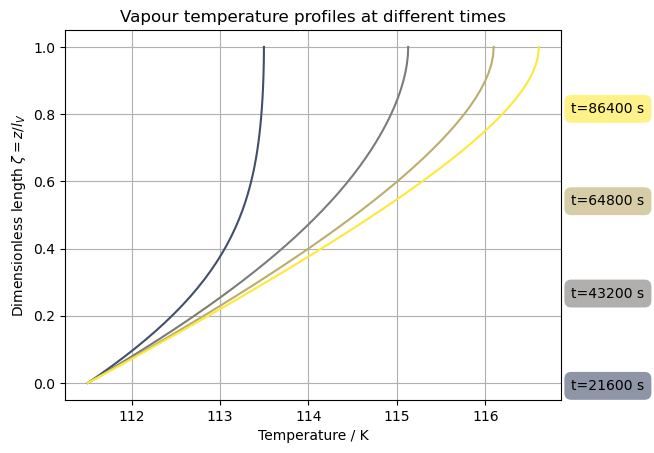

In [5]:
# Create a colormap
cmap = plt.get_cmap('cividis')

# Normalize the colormap based on the time range
norm = plt.Normalize(vmin=large_tank.sol.t[1], vmax=large_tank.sol.t[-1])

# Create a figure and axis
fig, ax = plt.subplots()

# Loop over each time step to  p
for i in range(1, n_plots+1):

    # Get the temperature at this time step
    T_v = large_tank.sol.y[1:, i*plot_step]
    
    # Plot the temperature profile at this time step, with color indicating the time
    ax.plot(T_v, large_tank.z_grid, color=cmap(norm(large_tank.sol.t[i * plot_step])))

    # Add a text box with the time value at the right of the plot
    ax.text(1.02, ((i-1 + 0.15)*plot_step) / len(large_tank.sol.t), f't={large_tank.sol.t[i*plot_step]:.0f} s', transform=ax.transAxes, 
            verticalalignment='center', bbox=dict(boxstyle='round,pad=0.5', edgecolor='none', facecolor=cmap(norm(large_tank.sol.t[i*plot_step])), alpha=0.6))

# Add a grid
ax.grid(True)

# Add labels
ax.set_ylabel(r'Dimensionless length $\zeta = z/l_V$')
ax.set_xlabel('Temperature / K')

# Add a title
ax.set_title('Vapour temperature profiles at different times')

# Show the plot
plt.show()

Visualise vapour to liquid heat transfer rate, $\dot{Q}_{\text{VL}}$, and heat ingresses to the liquid,  $\dot{Q}_{\text{L}}$ , and vapour,  $\dot{Q}_{\text{V}}$.

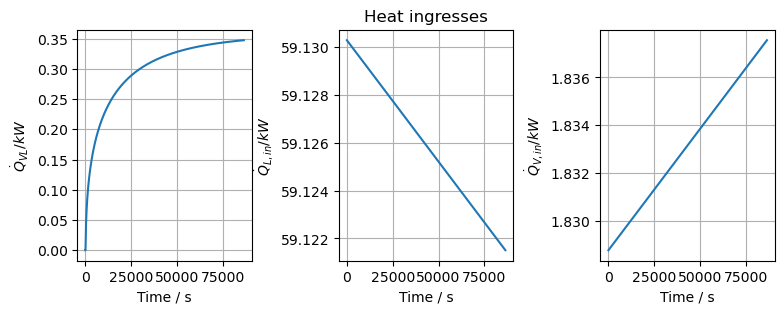

In [6]:
large_tank.plot_Q()

#### Plot liquid volume

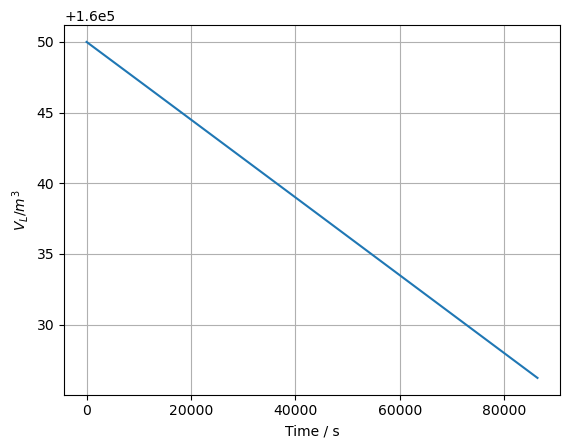

In [7]:
large_tank.plot_V_L()

#### Plot evaporation rate, $\dot{B}_{\text{L}}$, and boil-off gas rate, $\dot{B}_{}$

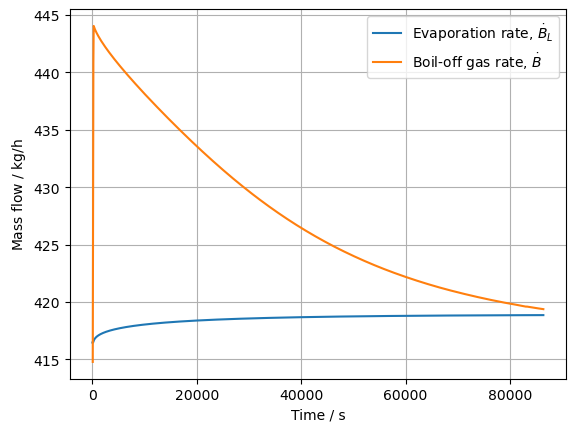

In [8]:
large_tank.plot_BOG(unit='kg/h')

Optional: CSV data export

If evaporation data is intended to be post-processed in another software, it can be exported readily with the help of the Pandas package.

In [9]:
# Import pandas 
import pandas as pd

In [10]:
# Create dataframe from dictionary
df_evap = pd.DataFrame.from_dict(large_tank.data)

# Save file to the current working directory
df_evap.to_csv('iso_LH2_80m3.csv')

# Show the first five columns of the dataframe in console
df_evap.head()

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,dV_L
0,0,111.507626,1.794607,-1.381155e-11,59130.291317,1828.771896,160050.000000,0.115688,0.115688,0.000000e+00,0.000000
1,60,111.507641,1.794607,4.079520e-02,59130.285248,1828.777965,160049.983574,0.115688,0.115219,-4.515982e-09,-0.000274
2,120,111.507656,1.794606,7.162245e-02,59130.279180,1828.784033,160049.967149,0.115688,0.118382,-6.435038e-07,-0.000274
3,180,111.511931,1.794529,1.084879e+01,59130.273111,1828.790102,160049.950723,0.115709,0.122454,-1.461787e-06,-0.000274
4,240,111.517401,1.794431,2.227589e+01,59130.267043,1828.796170,160049.934297,0.115731,0.123343,-1.636855e-06,-0.000274
